In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

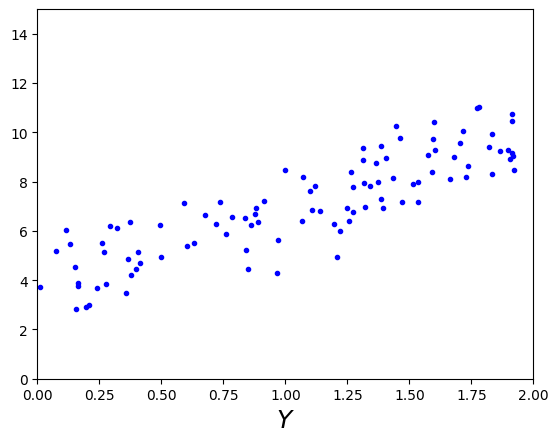

In [3]:
plt.plot(X, Y, 'b.')
plt.xlabel("$X$", fontsize = 18)
plt.xlabel("$Y$", rotation = 0, fontsize = 18)
_ = plt.axis([0, 2, 0, 15])

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

theta_best

array([[3.7898715 ],
       [3.07192805]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.7898715],
       [9.9337276]])

(0.0, 2.0, 0.0, 15.0)

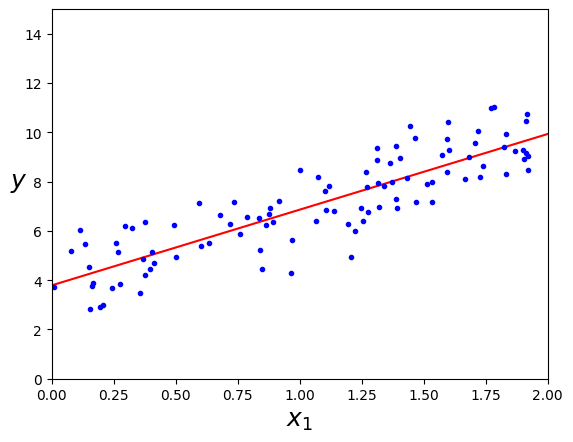

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, Y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

In [7]:
def cal_cost(theta, x, y):
    
    m = len(y)

    predictions = x.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))

    return cost

In [8]:
def gradient_descent(x, y, theta, learning_rate = 0.01, iterations = 100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(x, theta)

        theta = theta - (1/m)* learning_rate * (x.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, x, y)

    return theta, cost_history, theta_history

In [9]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2, 1)

x_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, Y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.523,
Theta1:          3.288
Final cost/MSE:  0.517


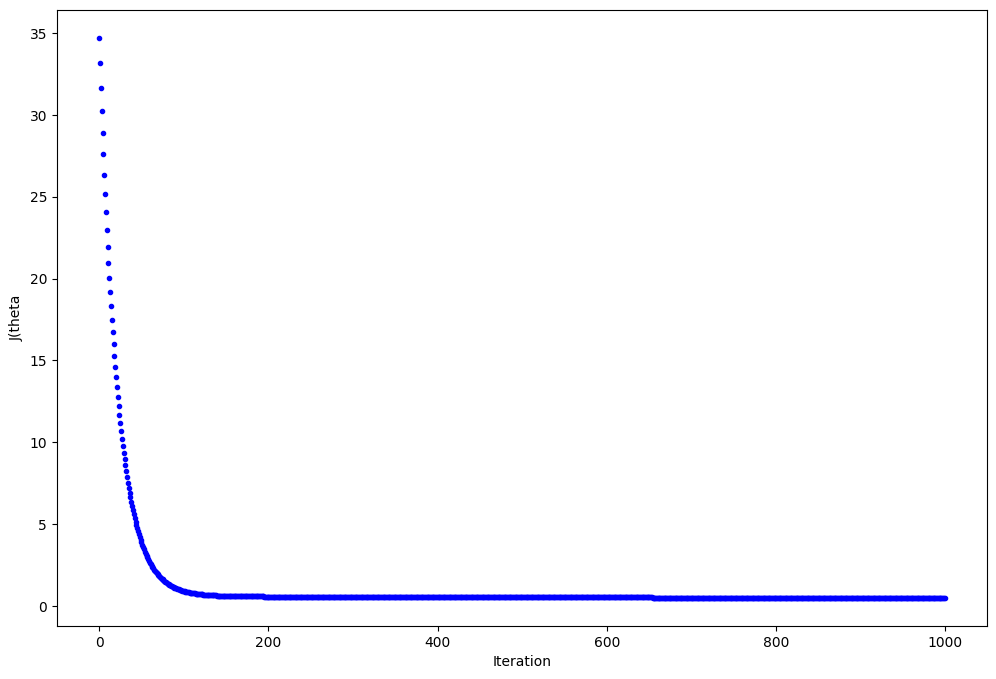

In [10]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.set_ylabel('J(theta')
ax.set_xlabel('Iteration')
_ = ax.plot(range(n_iter), cost_history, 'b.')

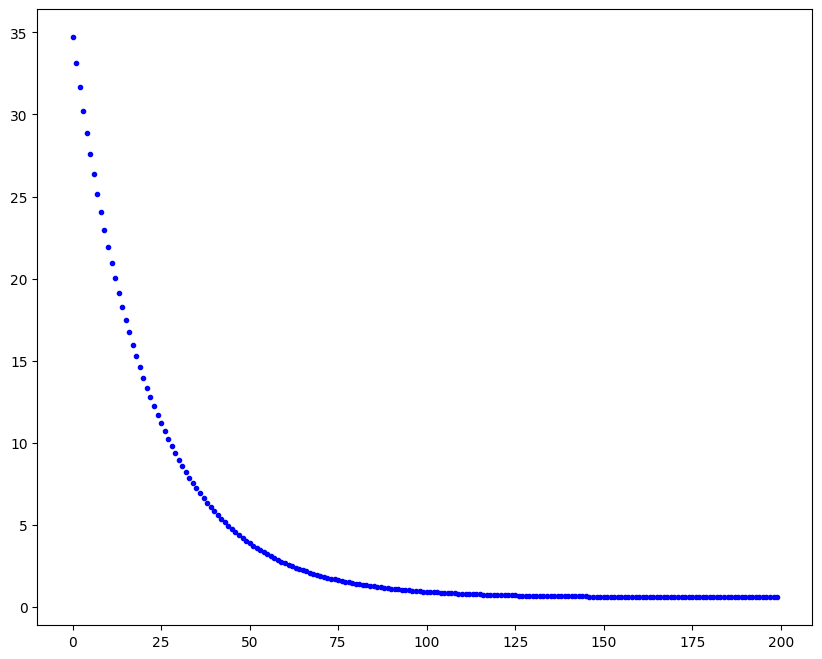

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.plot(range(200),cost_history[:200],'b.')

In [12]:
def plot_GD(n_iter, lr, ax, ax1 = None):
    _ = ax.plot(X, Y, 'b.')
    theta = np.random.randn(2, 1)

    tr = 0.1
    cost_history = np.zeros(n_iter)
    
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, Y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0)):
            _ = ax.plot(X, pred, 'r-', alpha = tr)

            if tr < 0.8:
                tr = tr + 0.2

    if not ax1 == None:
        _ = ax1.plot(range(n_iter), cost_history, 'b-')

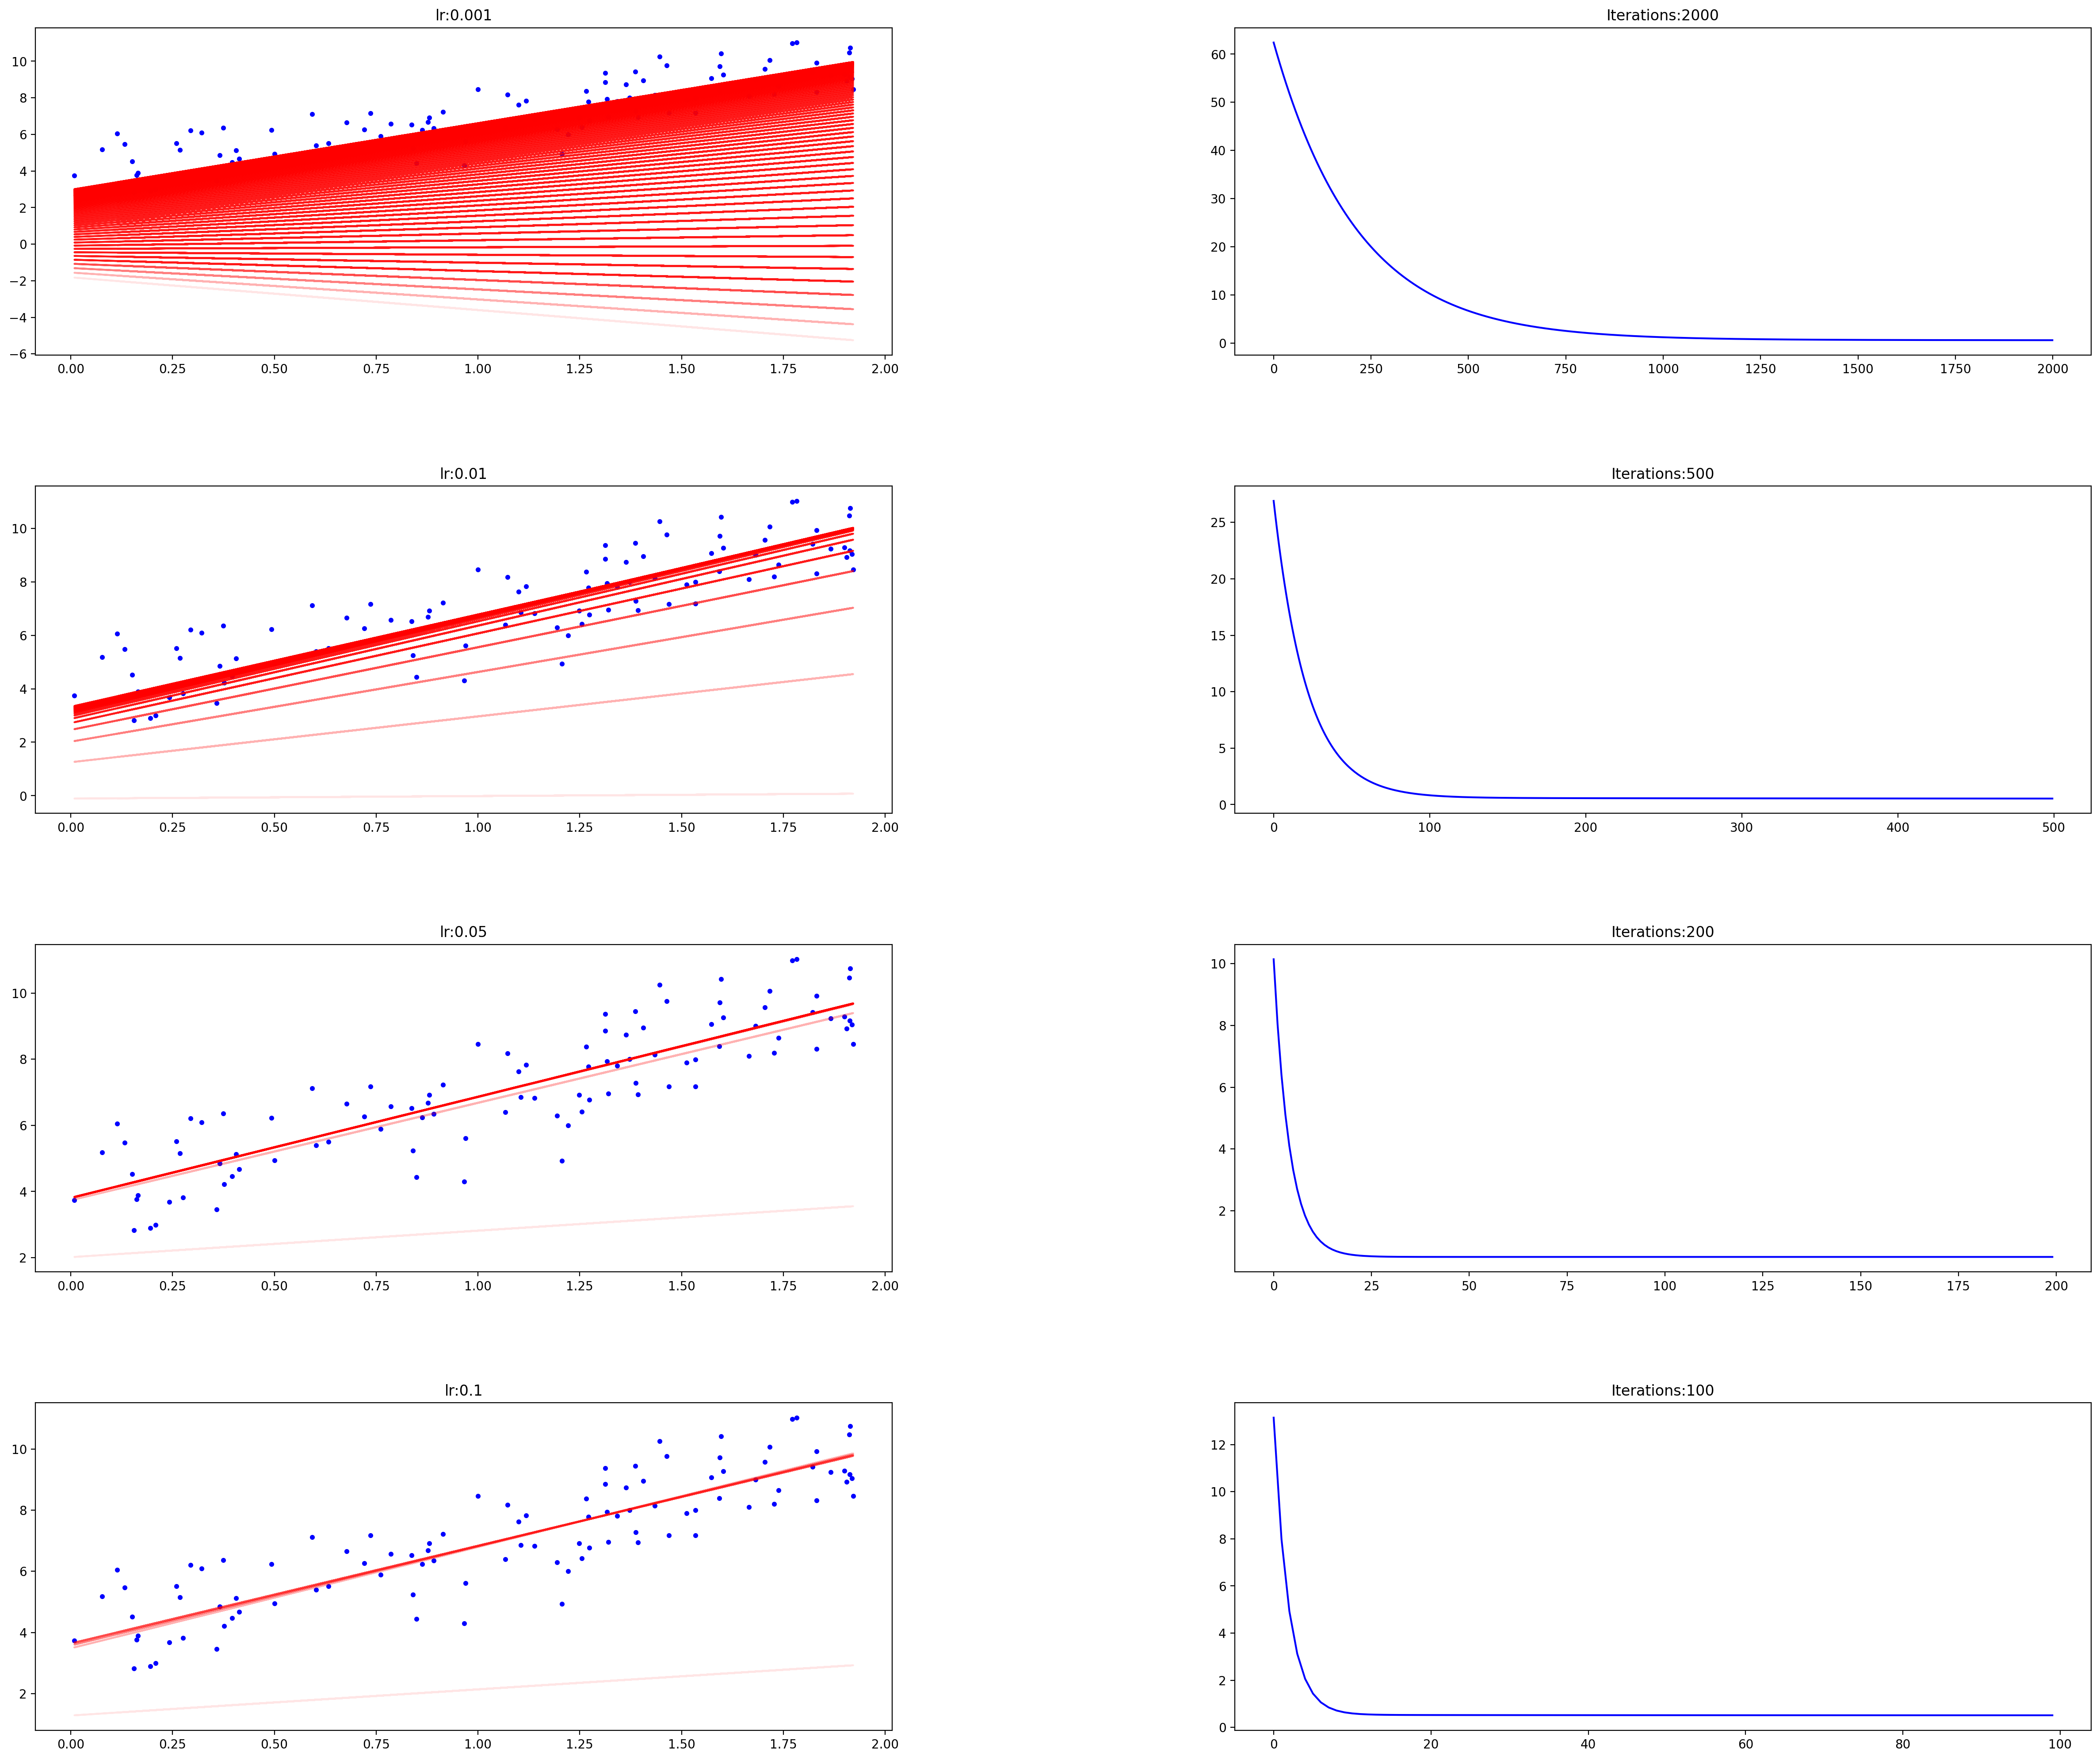

In [13]:
fig = plt.figure(figsize = (30, 25), dpi = 200)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]

count = 0

for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

In [14]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [15]:
lr = 0.5
n_iter = 50

theta  = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]

theta, cost_history = stocashtic_gradient_descent(X_b, Y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.750,
Theta1:          3.051
Final cost/MSE:  49.121


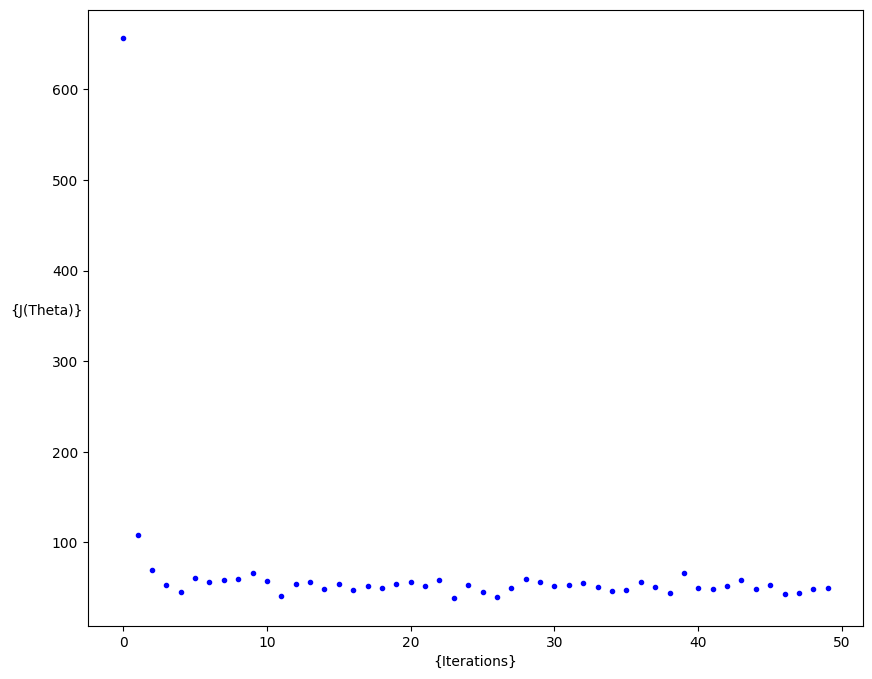

In [16]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_ = ax.plot(range(n_iter),cost_history,'b.')

In [17]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history


In [18]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)

theta,cost_history = minibatch_gradient_descent(X, Y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.727,
Theta1:          3.125
Final cost/MSE:  2.541


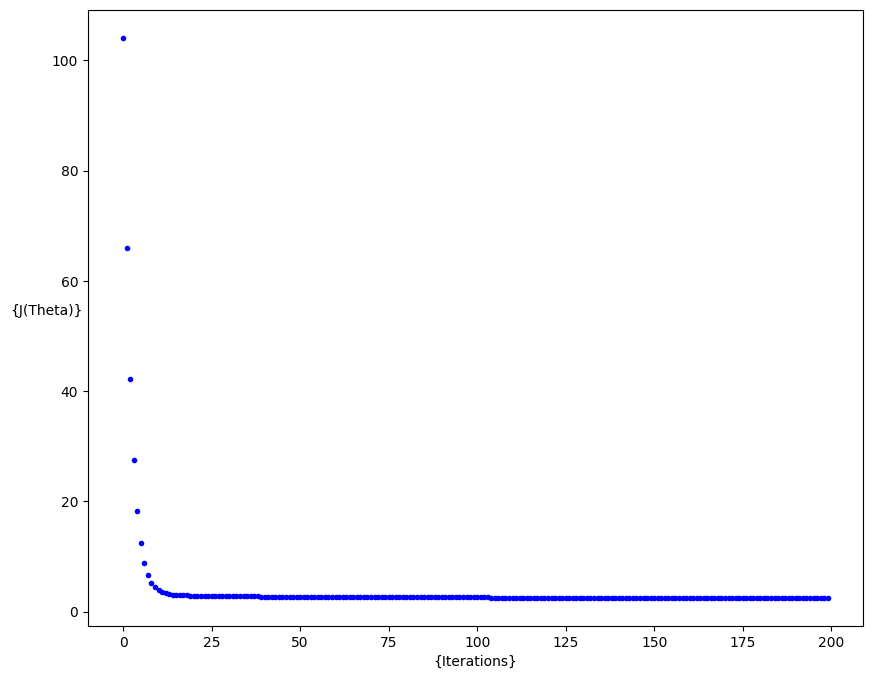

In [19]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_ = ax.plot(range(n_iter),cost_history,'b.')